<a href="https://colab.research.google.com/github/KaiwalyaZ/Credit-Card-Default/blob/main/Credit_card_default_kaiwalya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

# **INTRODUCTION-**

### Credit risk has traditionally been the greatest risk among all the risks that the banking and credit card industry are facing, and it is usually the one requiring the most capital

### Despite machine learning and big data have been adopted by the banking industry, the current applications used by the banks are mainly focused on credit score predicting. The disadvantage of heavily relying on credit score is banks would miss valuable customers who come from countries that are traditionally underbanked with no credit history or new immigrants who have repaying power but lack credit history. 

### Due to the scope of the project and lack of computational resources, this analysis is not intended to be exhaustive, we only applied 3 classification machine learning models

# **SCOPE OF THE PROJECT-**

### The purpose of this project is to conduct quantitative analysis on credit card default risk by
### applying 3 classification machine learning models.
### machine learning application on default risk itself and the predictor features do not include
### credit score or credit history. Due to the regulatory constraints that banks are facing, for
### example, The Fair Credit Reporting Act (FCRA), the algorithms used in this analysis are
### relatively simple and interpretable.


# <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Data Prepping<br>

###**Mount A Drive-**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the libraries** 

In [2]:
#Importing libraries for Exploratory data Analysis
import numpy as np # For some math operations on arrays in predictions.
import pandas as pd # To upload the large data set and wrangling the data.
import seaborn as sns  # Used for visualization of dataset.
import matplotlib.pyplot as plt # Used for visualization of dataset.
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import glm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sns.set()
pd.options.display.max_columns = None

installing some upgrade to read xls file.

In [4]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [5]:
# Loading Data set of xls file
cc_df = pd.read_excel(r'/content/drive/MyDrive/Credit card Github/default of credit card clients (1).xls',header=1)

## **First five values of given dataset**

In [6]:
# Checking the first five rows
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
cc_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
# Simplifying column names and bringing consistency
cc_df.rename(
    columns={"PAY_0": "PAY_1", "default payment next month": "DEFAULT"}, inplace=True
)
cc_df.columns = [name.lower() for name in list(cc_df.columns)]

Even though the data description said that the minimum value of `pay_i`'s was -1, all of them have a minimum value of -2. Also `marriage` has a minimum value of 0 but the description said the minimum value is 1. And `education` has a maximum value of 6 while it was supposed to have a maximum value of 4. I'll take a closer look later.

I notice that some of the `bill_amti`'s are negative. Although surprising, it is not uncommon to have a negative balance because of merchant refunds or overpayments. The values are a bit on the higher side and I'll take another look later.

# **Understanding The data**

## **Some Basic Information about Data set-**

In [14]:
# Checking the data types
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         30000 non-null  int64
 1   limit_bal  30000 non-null  int64
 2   sex        30000 non-null  int64
 3   education  30000 non-null  int64
 4   marriage   30000 non-null  int64
 5   age        30000 non-null  int64
 6   pay_1      30000 non-null  int64
 7   pay_2      30000 non-null  int64
 8   pay_3      30000 non-null  int64
 9   pay_4      30000 non-null  int64
 10  pay_5      30000 non-null  int64
 11  pay_6      30000 non-null  int64
 12  bill_amt1  30000 non-null  int64
 13  bill_amt2  30000 non-null  int64
 14  bill_amt3  30000 non-null  int64
 15  bill_amt4  30000 non-null  int64
 16  bill_amt5  30000 non-null  int64
 17  bill_amt6  30000 non-null  int64
 18  pay_amt1   30000 non-null  int64
 19  pay_amt2   30000 non-null  int64
 20  pay_amt3   30000 non-null  int64
 21  pay_amt4   3

In [15]:
# To observe the column variables length,type and shape.
list(cc_df.columns)

['id',
 'limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'default']

In [16]:
cc_df.shape

(30000, 25)

**Comment:-**
There are Total 30000 observations in the dataset

containing 25 columns

# **Checking the Null values for cleaning the Dataset for further analysis.**

In [17]:
# Checking for missing values
cc_df.isna().sum()

id           0
limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_1        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
default      0
dtype: int64

The `id` entries are unique for every row and seem to serve the purpose of a serial number. I will drop that variable.

In [18]:
# Checking the range of the numerical entries
cc_df.describe(
    include="all"
).transpose()  # the transpose view makes it more reader-friendly

,count,mean,std,min,25%,50%,75%,max
id,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# **Exploratory Data Analysis**

Even though the data description said that the minimum value of `pay_i`'s was -1, all of them have a minimum value of -2. Also `marriage` has a minimum value of 0 but the description said the minimum value is 1. And `education` has a maximum value of 6 while it was supposed to have a maximum value of 4. I'll take a closer look later.

I notice that some of the `bill_amti`'s are negative. Although surprising, it is not uncommon to have a negative balance because of merchant refunds or overpayments. The values are a bit on the higher side and I'll take another look later.

Text(0.5, 1.0, 'Distribution of defaulters vs non-defaulters')

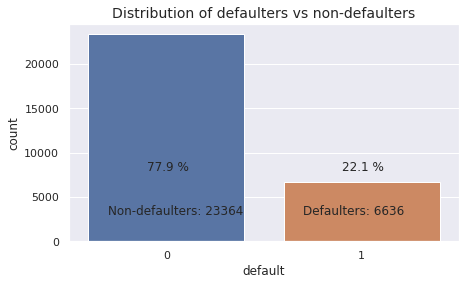

In [19]:
# The frequency of defaults
defs = cc_df["default"].sum()
non_defs = len(cc_df) - defs

# Percentage
def_perc = round(defs / len(cc_df) * 100, 1)
non_def_perc = round(non_defs / len(cc_df) * 100, 1)

# import sys
plt.figure(figsize=(7, 4))
sns.countplot("default", data=cc_df)
plt.annotate(
    "Non-defaulters: {}".format(non_defs),
    xy=(-0.3, 15000),
    xytext=(-0.3, 3000),
    size=12,
)
plt.annotate(
    "Defaulters: {}".format(defs), xy=(0.7, 15000), xytext=(0.7, 3000), size=12
)
plt.annotate(str(non_def_perc) + " %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(def_perc) + " %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title("Distribution of defaulters vs non-defaulters", size=14)

## The relationship Between the Variables and Default<br>

I will study the relationship between the features and credit card default. Although this is not definitive, it will give me a good understanding of the data. This will also help me make decisions about some of the features having values different than what was provided in the data description.

In [20]:
def compare_default_across_features(df, col_name, dict_label={}):
    """
    This function quantifies and displays the distribution of default across the various classes of a feature.
    
    INPUT:
    - df - (pd.DataFrame) the dataframe
    - col_name - (str) the column name of the feature being considered
    - dict_label - (dictionary) a dictionary relating the values of the column to what they represent
    
    OUTPUT:
    - Displays a bar plot showing the population distribution by feature values
    - Displays and returns a cross-tab showing the rate of default across each feature value
    - Displays a bar plot showing the population distribution and default by the feature values 
    """

    # Create a cross-tab and rename indices for readability
    cross_tab = pd.crosstab(df["default"], df[col_name], margins=True, normalize=False)

    new_index = {0: "Non-default proportion", 1: "Default proportion"}
    new_columns = dict_label

    cross_tab.rename(index=new_index, columns=new_columns, inplace=True)

    # Plot a bar graph showing population distribution by the feature values
    plt.figure(figsize=(10, 5))
    i = cross_tab.shape[1] - 1
    cross_tab.loc["All"][0:i].plot.bar(rot=30, fontsize=14)
    plt.title("Population Distribution by " + col_name, fontsize=20)
    plt.ylabel("count")
    plt.show()

    # Normalise the cross-tab and print it
    cross_tab_norm = cross_tab / cross_tab.loc["All"]
    display(cross_tab_norm)

    # Plot a bar graph showing population distribution by the feature values separating the defaulters and non-defaulters
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=col_name, hue="default", data=df)
    plt.title("Population Distribution by " + col_name + " with default and non-default",fontsize=20,)

    # Return the normalised cross-tab
    return cross_tab_norm